In [2]:
import pandas as pd
df= pd.read_csv("TSU_Hackathon_Schema.csv")
df.head()

,id,first_name,last_name,ethnicity,gender,classification,career_interest,weekly_hours_studied,gpa,math_classes_taken,computers_owned,high_school,applied_to_tsu
0,1,Kellen,Riveles,Asian,Male,Sophomore,Advertising/marketing,5,3.9,2,1,Stephen F. Austin High School,1
1,2,Shirline,Starrs,White,Female,Sophomore,Engineering,15,4.0,2,5+,Scarborough High School,1
2,3,Land,Rodrigo,Black/African American,Male,Senior,Entertainment,10,3.7,5,0,Westside High School,1
3,4,Shana,Leadbitter,Asian,Female,Senior,Entertainment,20,3.2,4,4,Evan E. Worthing High School,0
4,5,Annabal,McAnalley,White,Female,Senior,Fashion,10,2.2,5,2,Ebbert L. Furr High School,1


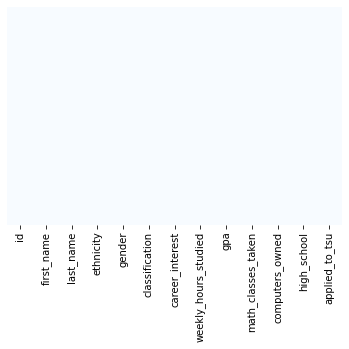

In [3]:
#Imported seaborn to visualize areas with null values
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='Blues')

In [4]:
#verify if null columns existed
df.isna().sum()

id                      0
first_name              0
last_name               0
ethnicity               0
gender                  0
classification          0
career_interest         0
weekly_hours_studied    0
gpa                     0
math_classes_taken      0
computers_owned         0
high_school             0
applied_to_tsu          0
dtype: int64

In [5]:
df.dtypes

id                        int64
first_name               object
last_name                object
ethnicity                object
gender                   object
classification           object
career_interest          object
weekly_hours_studied      int64
gpa                     float64
math_classes_taken        int64
computers_owned          object
high_school              object
applied_to_tsu            int64
dtype: object

In [10]:
print(df['career_interest'].unique())

['Advertising/marketing' 'Engineering' 'Entertainment' 'Fashion'
 'Agriculture' 'Finance' 'Education' 'Medical' 'Multimedia']


In [16]:
#filtered columns for students that applied to TSU and were interested in engineering
# extracted each high school and average gpa of students that met previous criteria
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#select only students that applied to Tsu
TSU_Scholars =df[df['applied_to_tsu'] == 1 & df['career_interest'].str.contains('Engineering')]
TSU_data_viz=TSU_Scholars.groupby(['high_school']).agg({'gpa':'mean'}).reset_index()
TSU_data_viz.head(30)

,high_school,gpa
0,Bellaire High School,2.907692
1,Booker T. Washington High School,2.775000
2,Carnegie Vanguard High School,2.862500
3,Challenge Early College High School,2.841667
4,Charles H. Milby High School,2.950000
5,César E. Chávez High School,2.575000
6,East Early College High School,3.191667
7,Eastwood Academy,2.881818
8,Ebbert L. Furr High School,3.144444
9,Empowerment College Preparatory High School,3.005882


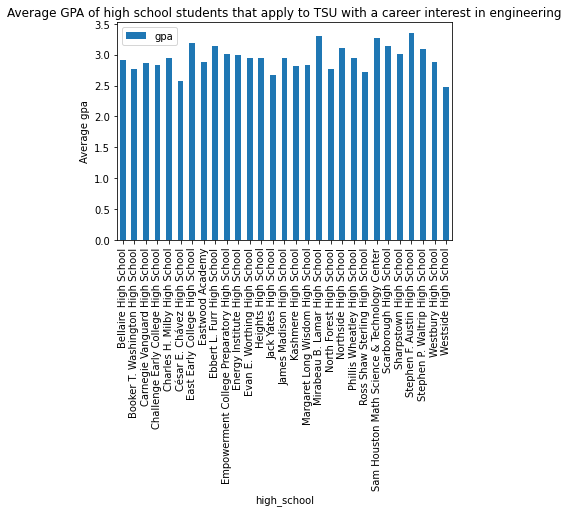

In [22]:
# Plot the bar chart
TSU_data_viz.plot.bar(x='high_school',y='gpa')

# Add a title and labels for the x and y axes
plt.title('Average GPA of high school students that apply to TSU with a career interest in engineering')
plt.xlabel('high_school')
plt.ylabel('Average gpa')

# Show the plot
plt.show()



In [15]:
TSU_data_viz.shape

(199, 3)

In [40]:
#used plotly to make interactive plot
import plotly.express as px
#added a hue to show the students that applied to tsu and the ones that didn't
fig = px.bar(TSU_data_viz, x='high_school', y='gpa')
fig.show()


In [35]:
TSU_data_viz2=TSU_Scholars.groupby(['high_school','gender']).agg({'gpa':'mean'}).reset_index()
TSU_data_viz2.head(30)

,high_school,gender,gpa
0,Bellaire High School,Female,3.137500
1,Bellaire High School,Genderfluid,2.000000
2,Bellaire High School,Male,2.675000
3,Booker T. Washington High School,Female,2.825000
4,Booker T. Washington High School,Male,2.600000
5,Booker T. Washington High School,Polygender,3.600000
6,Carnegie Vanguard High School,Agender,3.200000
7,Carnegie Vanguard High School,Female,2.775000
8,Carnegie Vanguard High School,Genderqueer,3.500000
9,Carnegie Vanguard High School,Male,2.550000


In [41]:
# Create a scatter plot to gather more insights 
fig2 = px.scatter(TSU_data_viz2, x='high_school', y='gpa', color='gender')


fig2.show()

In [55]:
TSU_data_viz3= TSU_Scholars.groupby(['ethnicity','gender',]).agg({'gpa':'mean'}).reset_index()
TSU_data_viz3.head()

,ethnicity,gender,gpa
0,American Indian/Alaska Native,Agender,2.500000
1,American Indian/Alaska Native,Bigender,2.100000
2,American Indian/Alaska Native,Female,2.915789
3,American Indian/Alaska Native,Genderqueer,2.000000
4,American Indian/Alaska Native,Male,2.890476


In [57]:
fig3 = px.scatter(TSU_data_viz3, x='ethnicity', y='gpa', color='gender')

fig3.show()

In [61]:
fig4 = px.box(TSU_data_viz3, x='ethnicity', y='gpa')

fig4.show()

In [74]:
TSU_data_viz4=TSU_Scholars.groupby(['high_school','gender']).agg({'gpa':'mean','weekly_hours_studied':'sum','math_classes_taken':'sum'}).reset_index()
TSU_data_viz4.head(30)

,high_school,gender,gpa,weekly_hours_studied,math_classes_taken
0,Bellaire High School,Female,3.137500,105,27
1,Bellaire High School,Genderfluid,2.000000,10,4
2,Bellaire High School,Male,2.675000,60,7
3,Booker T. Washington High School,Female,2.825000,45,15
4,Booker T. Washington High School,Male,2.600000,45,18
5,Booker T. Washington High School,Polygender,3.600000,15,5
6,Carnegie Vanguard High School,Agender,3.200000,15,1
7,Carnegie Vanguard High School,Female,2.775000,35,14
8,Carnegie Vanguard High School,Genderqueer,3.500000,10,4
9,Carnegie Vanguard High School,Male,2.550000,0,5


In [75]:
fig5 = px.box(TSU_data_viz4, x='high_school', y='math_classes_taken')

fig5.show()

In [76]:
fig6 = px.box(TSU_data_viz4, x='high_school', y='weekly_hours_studied')

fig6.show()

In [77]:
fig7= px.scatter(TSU_data_viz4, x='high_school', y='math_classes_taken', color='gender')
fig7.show()

In [81]:
#visualize percentage of high school students enrolled and the interactive plot shows the number of math classes students take
fig8 = px.pie(TSU_data_viz4, values='weekly_hours_studied', names='high_school')

fig8.show()

In [88]:
fig9 = px.pie(TSU_data_viz4,values='math_classes_taken', names='high_school')


fig9.show()

In [92]:
# Next steps would be to make a side by side comparison of students that did apply and students that did not end up applying to TSU



In [ ]:
Data_viz2=df.groupby(['high_school','applied_to_tsu']).agg({'gpa':'mean'}).reset_index()
Data_viz2.head()

,high_school,applied_to_tsu,gpa
0,Bellaire High School,0,2.963636
1,Bellaire High School,1,2.973913
2,Booker T. Washington High School,0,2.885714
3,Booker T. Washington High School,1,2.725000
4,Carnegie Vanguard High School,0,2.720000


In [ ]:
comp_fig = px.bar(Data_viz2, x='high_school', y='gpa',color='applied_to_tsu')
comp_fig.show()